In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')
    
from qiskit import QuantumProgram
import Qconfig

In [2]:
Q_SPECS = {
    'circuits': [{
        'name': 'Circuit',
        'quantum_registers': [{
            'name': 'qr',
            'size': 5
        }],
        'classical_registers': [{
            'name': 'cr',
            'size': 5
        }]}],
}

In [3]:
qp = QuantumProgram(specs=Q_SPECS)

In [5]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

In [6]:
# Pauli X gate to qubit 1 in the Quantum Register "qr" 
circuit.x(quantum_r[1])

# Pauli Y gate to qubit 2 in the Quantum Register "qr" 
circuit.y(quantum_r[2])

# Pauli Z gate to qubit 3 in the Quantum Register "qr" 
circuit.z(quantum_r[3])

# CNOT (Controlled-NOT) gate from qubit 3 to qubit 2
circuit.cx(quantum_r[3], quantum_r[2])

# add a barrier to your circuit
circuit.barrier()

# H (Hadamard) gate to qubit 0 in the Quantum Register "qr" 
circuit.h(quantum_r[0])

# S Phase gate to qubit 0
circuit.s(quantum_r[0])

# T Phase gate to qubit 1
circuit.t(quantum_r[1])

# identity gate to qubit 1
circuit.iden(quantum_r[1])

# first physical gate: u1(lambda) to qubit 0
circuit.u1(0.3, quantum_r[0])

# second physical gate: u2(phi,lambda) to qubit 1
circuit.u2(0.3, 0.2, quantum_r[1])

# second physical gate: u3(theta,phi,lambda) to qubit 2
circuit.u3(0.3, 0.2, 0.1, quantum_r[2])

# rotation around the x-axis to qubit 0
circuit.rx(0.2, quantum_r[0])

# rotation around the y-axis to qubit 1
circuit.ry(0.2, quantum_r[1])

# rotation around the z-axis to qubit 2
circuit.rz(0.2, quantum_r[2])

# Classical if, from qubit2 gate Z to classical bit 1
# circuit.z(quantum_r[2]).c_if(classical_r, 0)

# measure gate from qubit 0 to classical bit 0
circuit.measure(quantum_r[0], classical_r[0])
circuit.measure(quantum_r[1], classical_r[1])
circuit.measure(quantum_r[2], classical_r[2])

In [7]:
qp.get_circuit_names()

dict_keys(['Circuit'])

In [8]:
# QASM from a program

QASM_source = qp.get_qasm('Circuit')

print(QASM_source)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[5];
creg cr[5];
x qr[1];
y qr[2];
z qr[3];
cx qr[3],qr[2];
barrier qr[0],qr[1],qr[2],qr[3],qr[4];
h qr[0];
s qr[0];
t qr[1];
id qr[1];
u1(0.300000000000000) qr[0];
u2(0.300000000000000,0.200000000000000) qr[1];
u3(0.300000000000000,0.200000000000000,0.100000000000000) qr[2];
rx(0.200000000000000) qr[0];
ry(0.200000000000000) qr[1];
rz(0.200000000000000) qr[2];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];
measure qr[2] -> cr[2];



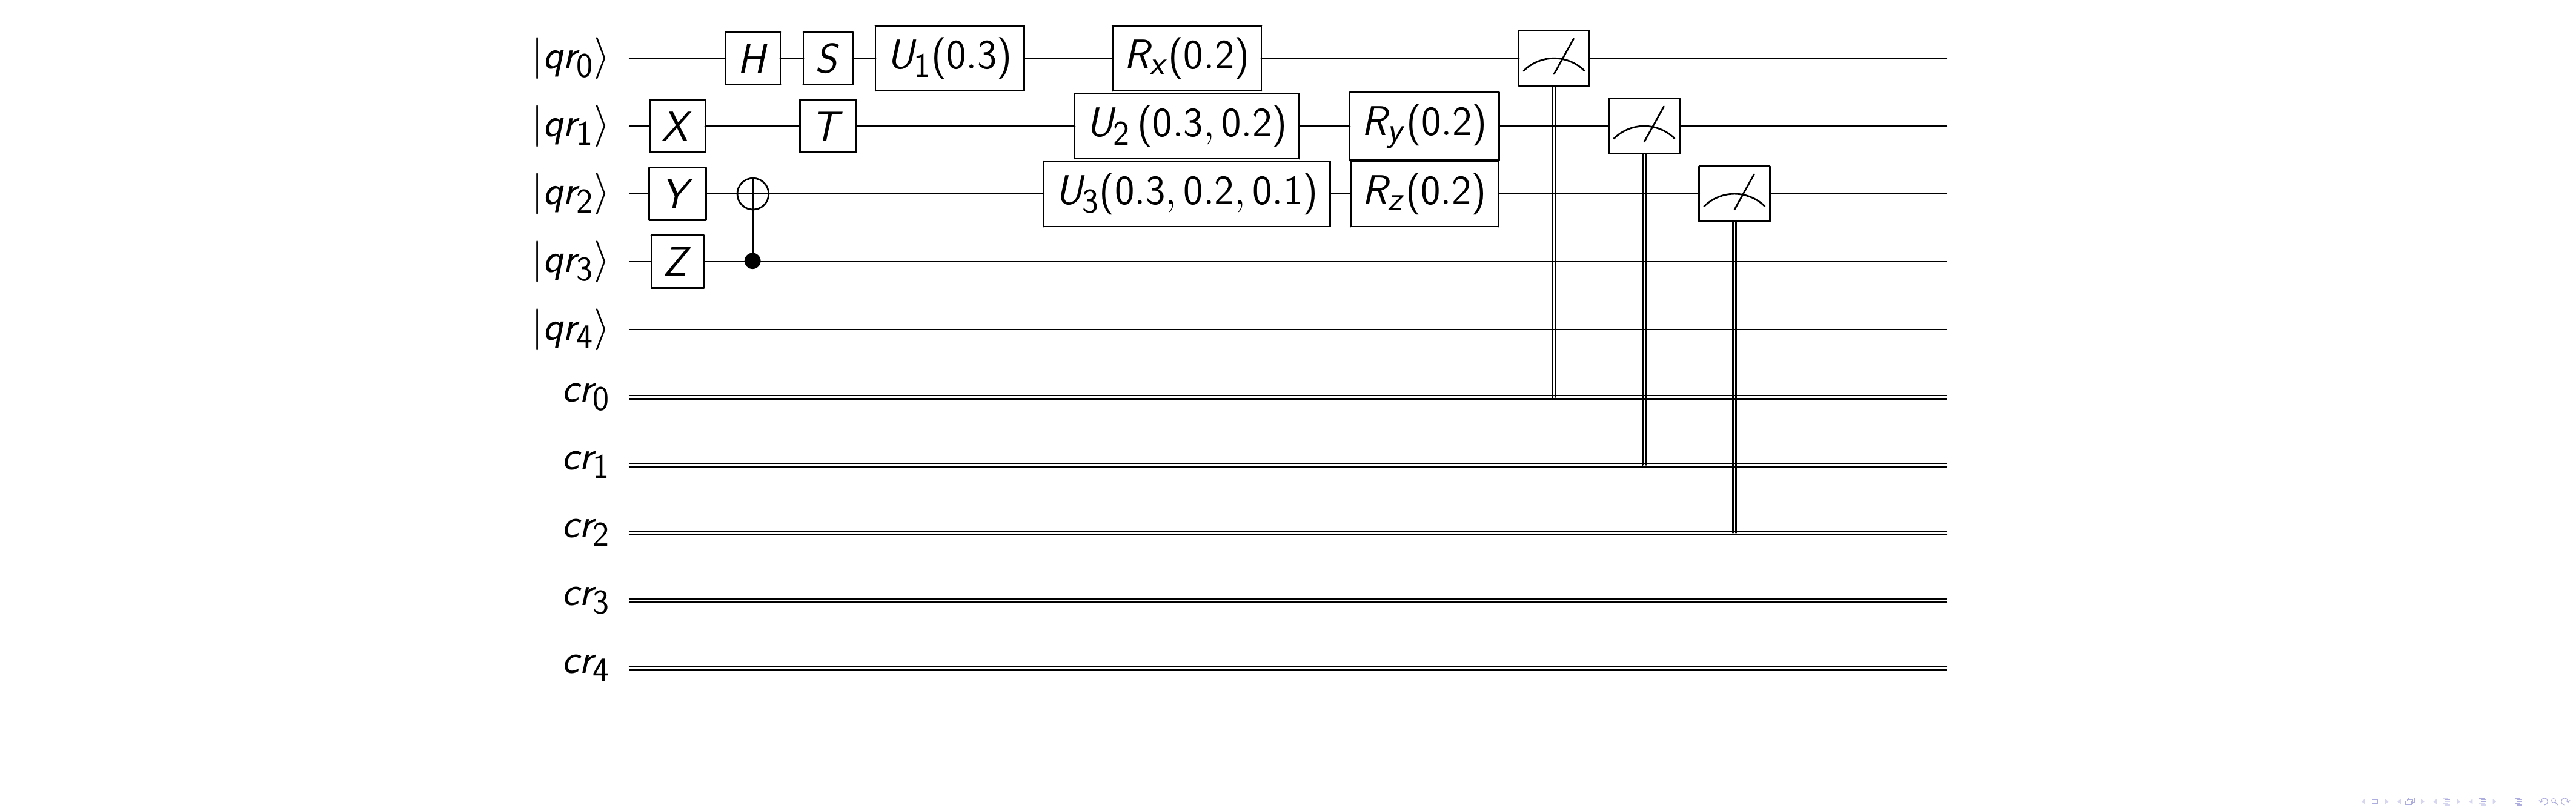

In [10]:
import os
import shutil
from qiskit.tools.visualization import latex_drawer
import pdf2image

def circuitImage(circuit, basis="u1,u2,u3,cx"):
    """Obtain the circuit in image format
    Note: Requires pdflatex installed (to compile Latex)
    Note: Required pdf2image Python package (to display pdf as image)
    """
    filename='circuit'
    tmpdir='tmp/'
    if not os.path.exists(tmpdir):
        os.makedirs(tmpdir)
    latex_drawer(circuit, tmpdir+filename+".tex", basis=basis)
    os.system("pdflatex -output-directory {} {}".format(tmpdir, filename+".tex"))
    images = pdf2image.convert_from_path(tmpdir+filename+".pdf")
    shutil.rmtree(tmpdir)
    return images[0]

basis="u1,u2,u3,cx,x,y,z,h,s,t,rx,ry,rz"
circuitImage(circuit, basis)

In [11]:
backend = 'local_qasm_simulator' 
circuits = ['Circuit']  # Group of circuits to execute

In [12]:
qobj=qp.compile(circuits, backend) # Compile your program

In [13]:
result = qp.run(qobj, wait=2, timeout=240)
print(result)

COMPLETED


In [14]:
result.get_counts('Circuit')

{'00000': 9,
 '00001': 7,
 '00010': 4,
 '00011': 2,
 '00100': 347,
 '00101': 235,
 '00110': 254,
 '00111': 166}